# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
print(type(tips))
tips

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot, kdeplot, displot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

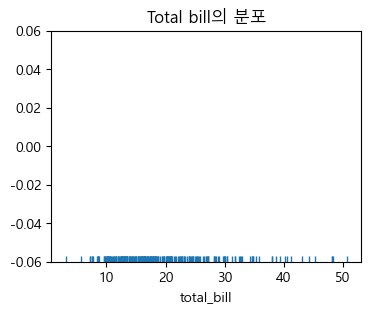

In [9]:
plt.figure(figsize=(4, 3))

# sns.rugplot(tips['total_bill'], alpha=0.5)
sns.rugplot(x='total_bill', data=tips) # data: DataFrame 지정. x="컬럼명"
plt.title('Total bill의 분포')
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

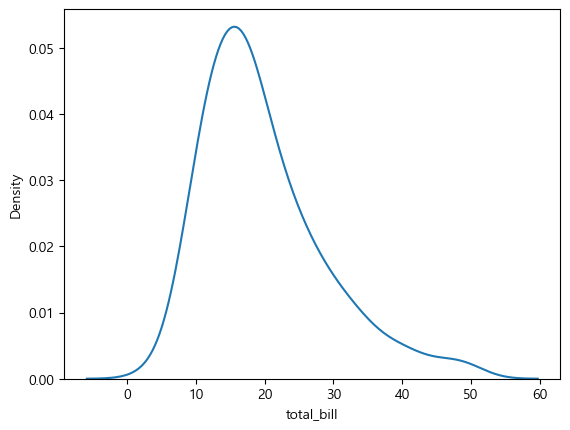

In [10]:
# sns.kdeplot(tips['total_bill'])
sns.kdeplot(x='total_bill', data=tips)
plt.show()

### displot()
- 히스토그램을 기준으로 rugplot, kdeplot을 같이 그릴 수 있다.

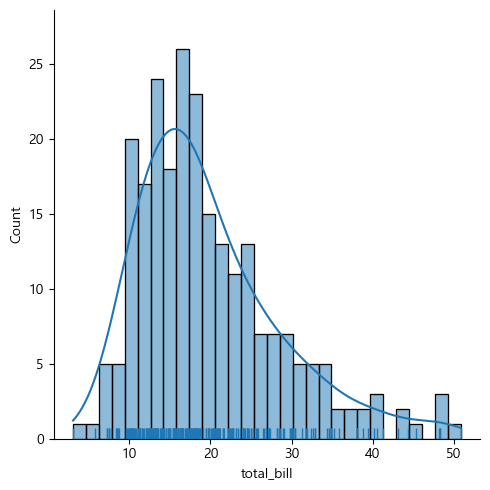

In [13]:
sns.displot(x='total_bill', data=tips, bins=30,
           rug = True,
           kde = True)
plt.show()

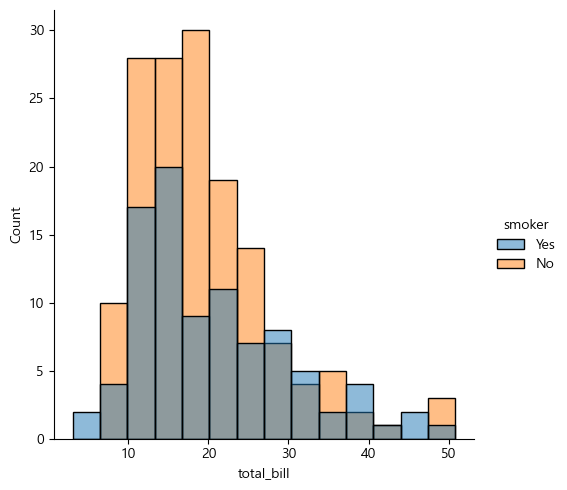

In [15]:
# tips.groupby('smoker')['total_bill']
sns.displot(x='total_bill', hue= 'smoker', data=tips)
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

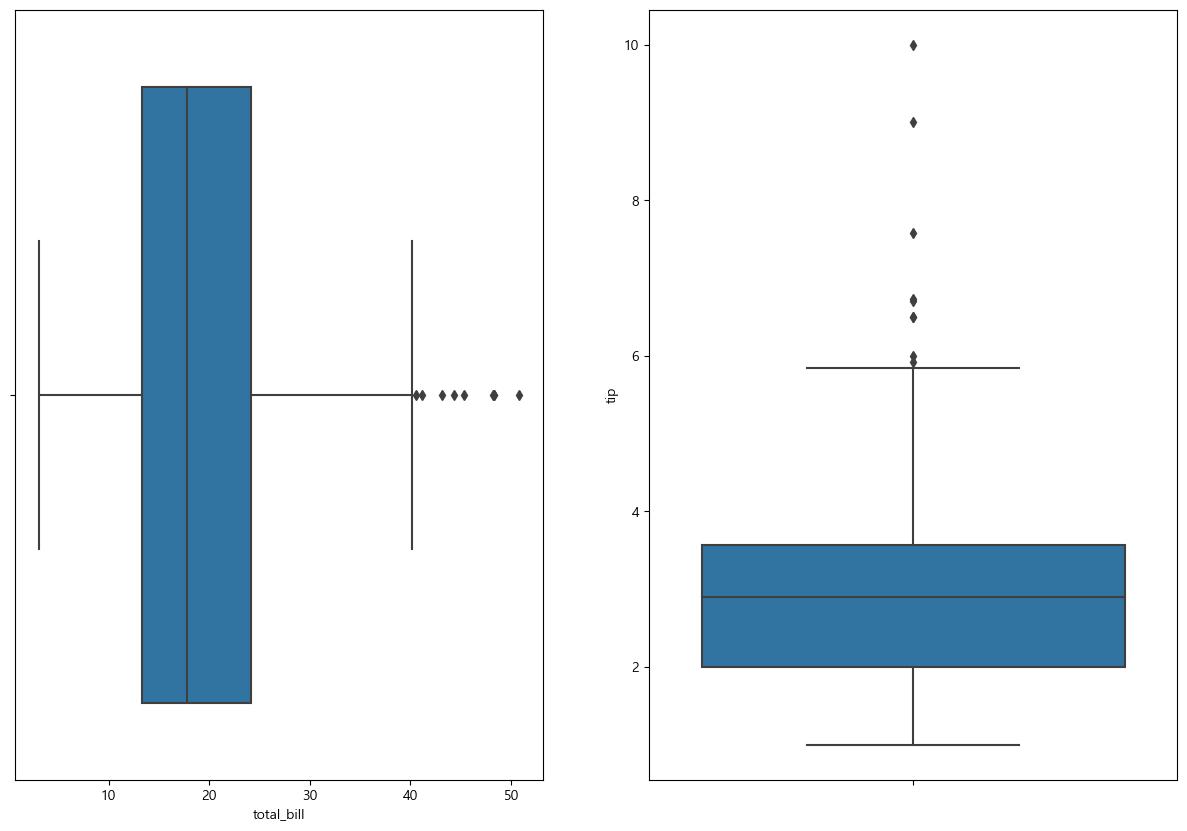

In [18]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# x(y): 연속형, y(x): 범주형
sns.boxplot(x='total_bill', data=tips, ax=ax1)
sns.boxplot(y='tip', data=tips, ax=ax2)
plt.show()

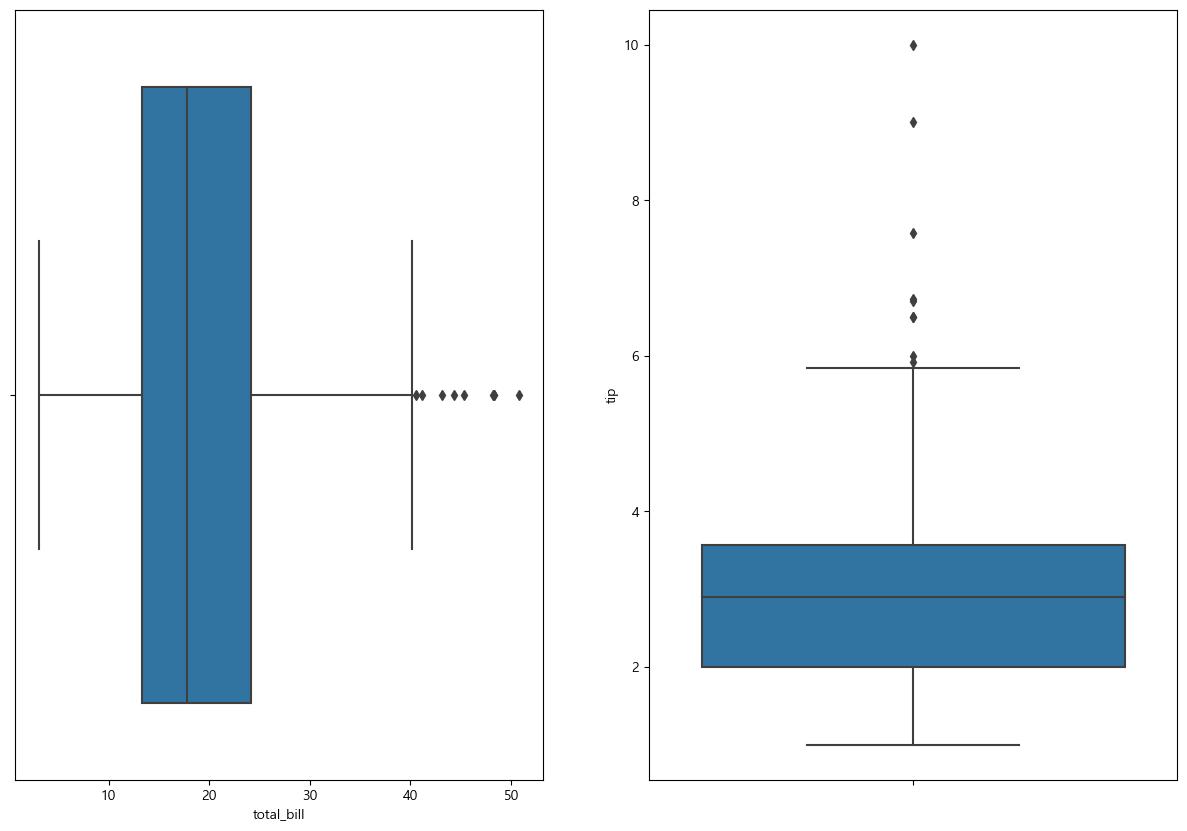

In [21]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='total_bill', data=tips)

plt.subplot(1, 2, 2)
sns.boxplot(y='tip', data=tips)
plt.show()

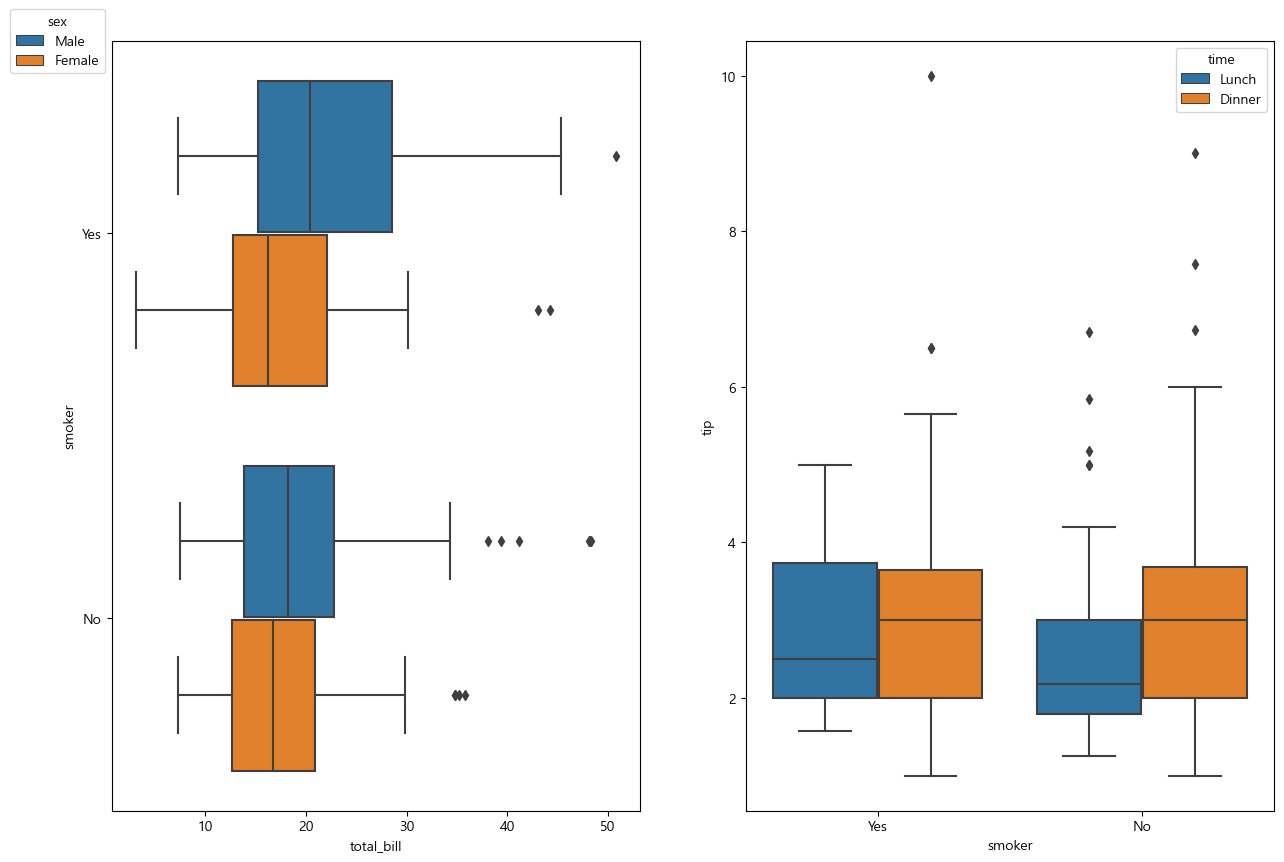

In [27]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# x(y): 연속형, y(x): 범주형
sns.boxplot(x = 'total_bill',
            y = 'smoker',
            hue = 'sex',
            data = tips, ax=ax1)
sns.boxplot(y='tip', x='smoker', hue='time', data=tips, ax=ax2)
ax1.legend(bbox_to_anchor=(0,1.05), loc='upper right', title='sex')
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

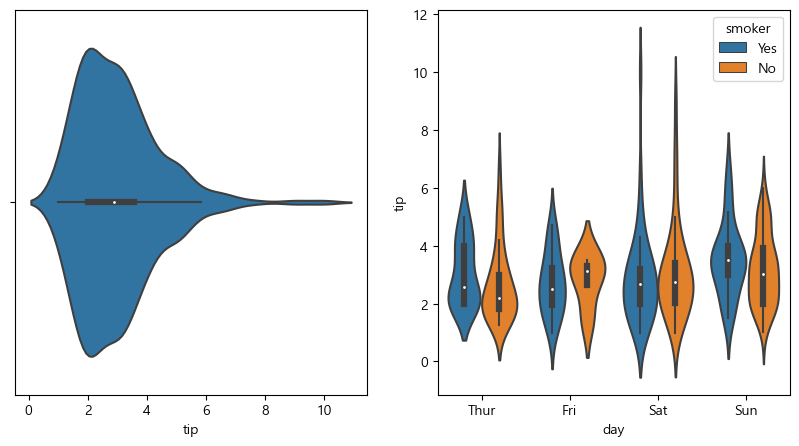

In [37]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(data=tips, x='tip')

plt.subplot(1, 2, 2)
sns.violinplot(data=tips, y='tip', 
               x='day',
               hue='smoker')

plt.show()

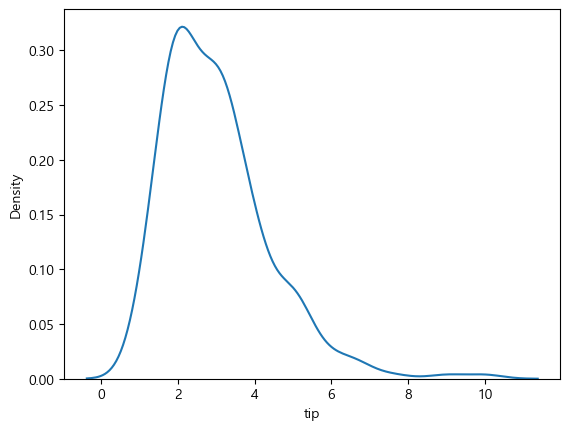

In [33]:
sns.kdeplot(data=tips, x='tip')
plt.show()

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

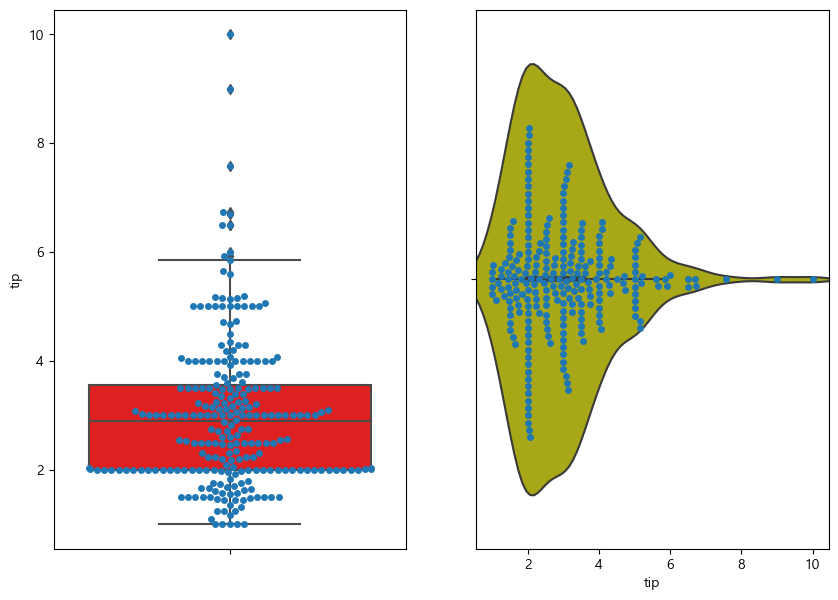

In [44]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
sns.boxplot(y = 'tip', data = tips, color='r')
sns.swarmplot(y = 'tip', data = tips)

plt.subplot(1, 2, 2)
sns.violinplot(x = 'tip', data = tips, color='y')
sns.swarmplot(x = 'tip', data = tips)
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

<AxesSubplot: >

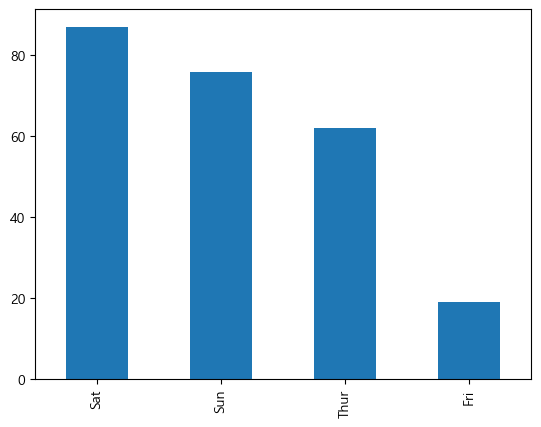

In [46]:
tips['day'].value_counts().plot.bar()

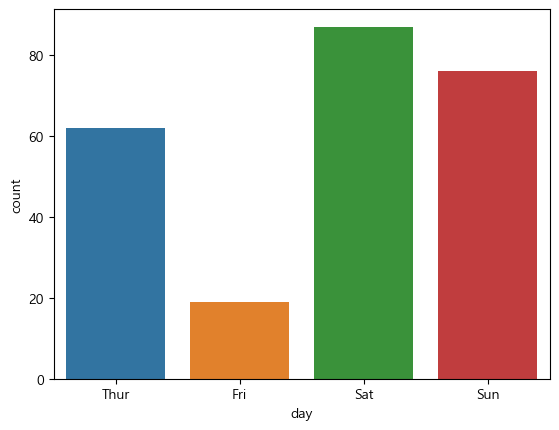

In [47]:
sns.countplot(data=tips, x='day')
plt.show()

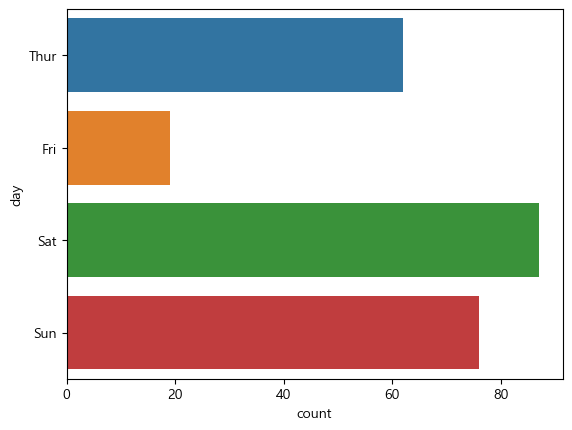

In [48]:
sns.countplot(data=tips, y='day')
plt.show()

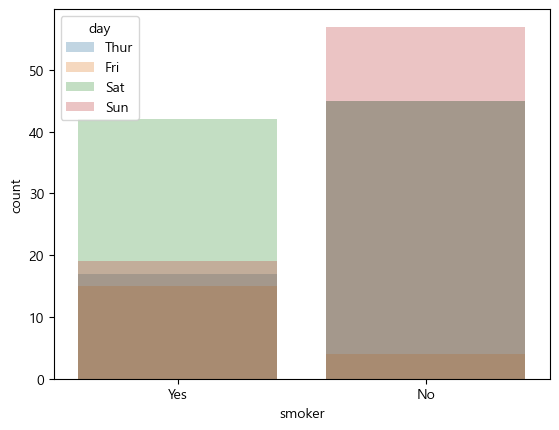

In [52]:
# 흡연/비흡연자 수 요일별로 나눠서 시각화
sns.countplot(x='smoker', hue='day', data=tips,
             dodge=False, # 수평누적막대 여부 : 기본 -True
             alpha=0.3)
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

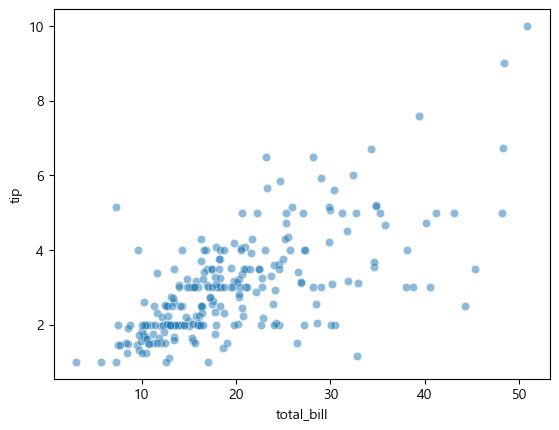

In [55]:
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.5)
plt.show()

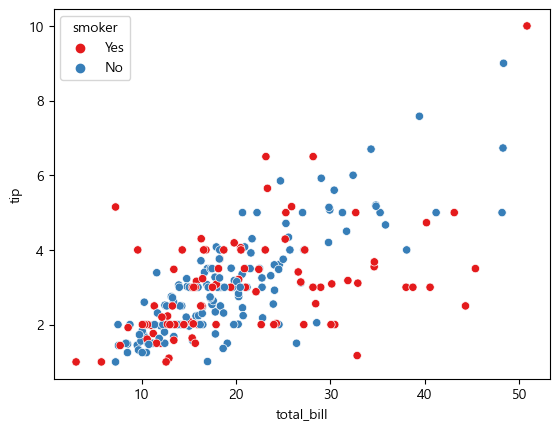

In [61]:
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                hue='smoker', # smoker 별로
                palette='Set1') 
plt.show()

In [60]:
sns.color_palette() # 색 순서

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [62]:
sns.set_palette('Set1') # 전체 색 바꾸기

In [63]:
sns.color_palette()

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

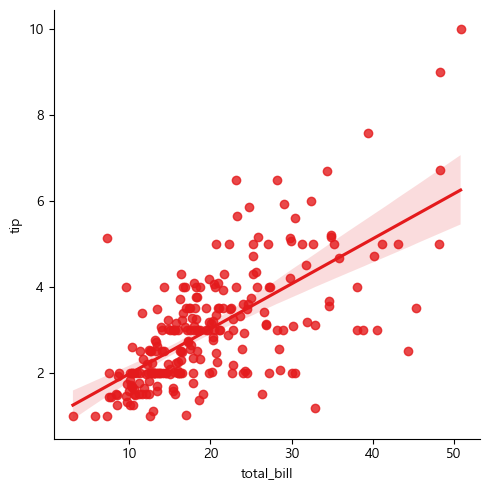

In [69]:
sns.lmplot(data=tips, x='total_bill', y='tip')
plt.show()

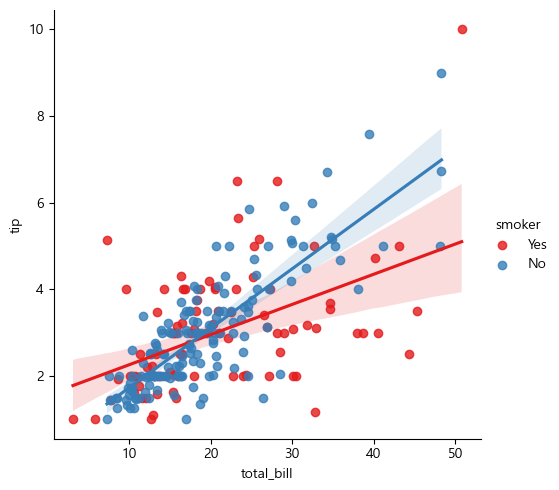

In [66]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

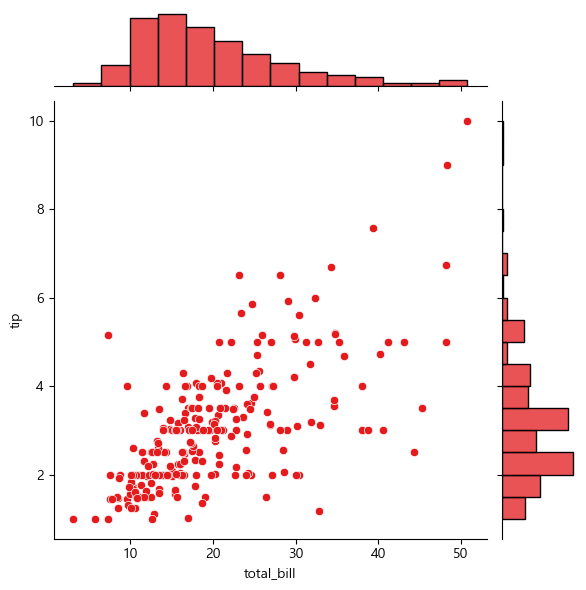

In [67]:
sns.jointplot(data=tips, x='total_bill', y = 'tip')
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

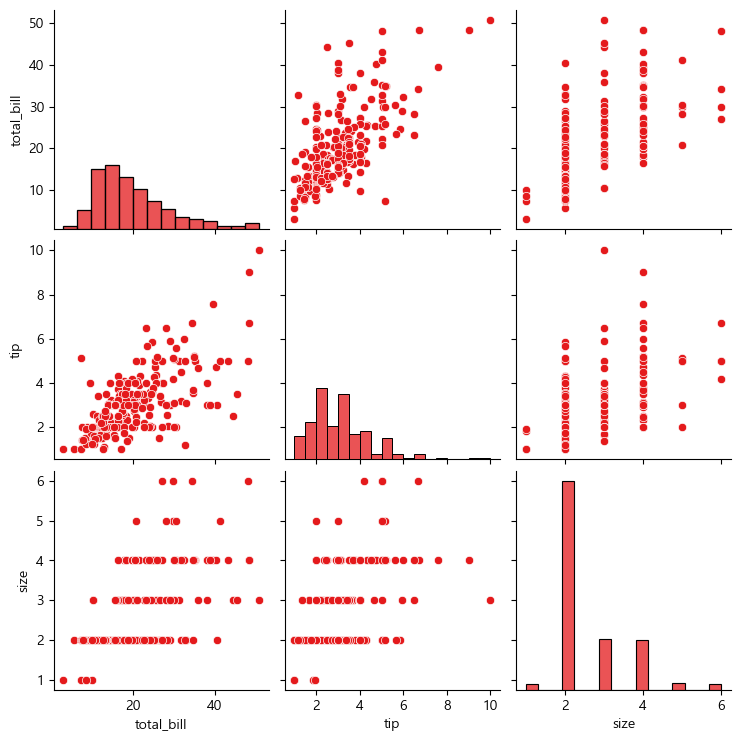

In [71]:
sns.pairplot(tips)
plt.show()

## heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [75]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


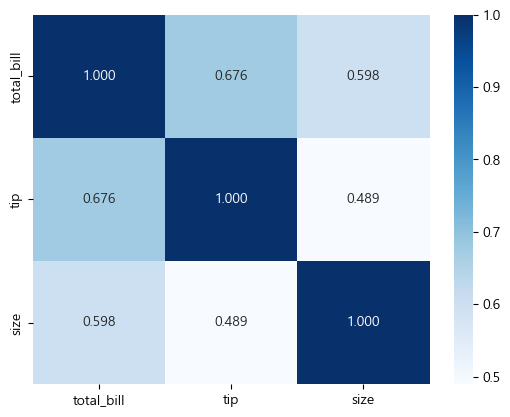

In [79]:
sns.heatmap(tips.corr(numeric_only=True), cmap='Blues',
           annot=True,
           fmt='.3f')
plt.show()

## lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [82]:
import pandas as pd
import numpy as np

index = pd.date_range('2023/01/01', freq='MS', periods=10)
values = np.random.randint(1, 100, size=(10, 3))
df = pd.DataFrame(values, index=index, columns=['no1', 'no2', 'no3'])
df

,no1,no2,no3
2023-01-01,87,68,61
2023-02-01,64,22,87
2023-03-01,16,42,46
2023-04-01,74,58,41
2023-05-01,70,32,78
2023-06-01,33,39,69
2023-07-01,3,97,59
2023-08-01,69,45,68
2023-09-01,15,35,94
2023-10-01,13,38,18


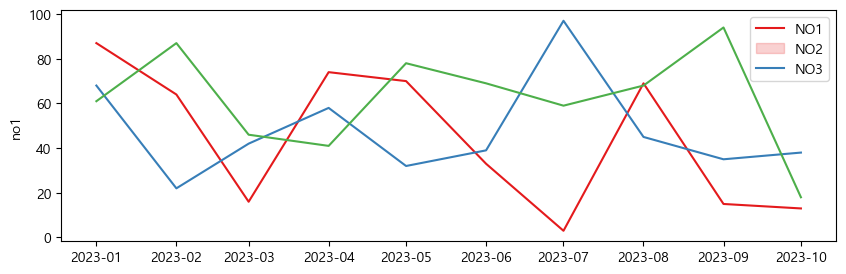

In [86]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=df, y='no1', x=df.index)
sns.lineplot(data=df, y='no2', x=df.index)
sns.lineplot(data=df, y='no3', x=df.index)
plt.legend(['NO1', 'NO2', 'NO3'])
plt.show()

In [87]:
df['cate'] = ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'C']
df

,no1,no2,no3,cate
2023-01-01,87,68,61,A
2023-02-01,64,22,87,B
2023-03-01,16,42,46,C
2023-04-01,74,58,41,A
2023-05-01,70,32,78,B
2023-06-01,33,39,69,C
2023-07-01,3,97,59,A
2023-08-01,69,45,68,B
2023-09-01,15,35,94,C
2023-10-01,13,38,18,C


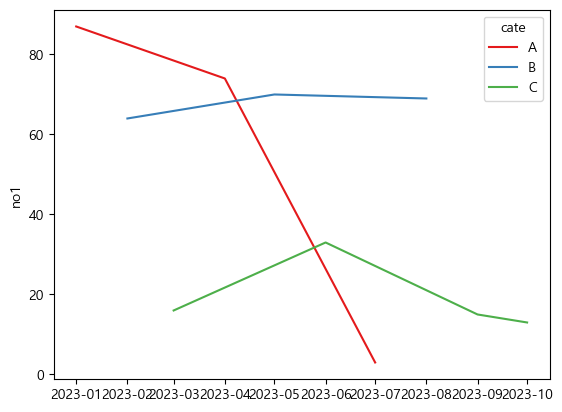

In [89]:
sns.lineplot(data=df, x=df.index, y='no1', hue='cate')
plt.show()